In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

In [30]:
data_df=pd.read_csv('Improved_All_Combined_hr_rsp_binary.csv')

In [31]:
data_df.head()

,Participant,HR,respr,Time(sec),Label
0,2,118.00,12.127693,1644227583,0
1,2,113.50,12.127693,1644227584,0
2,2,93.00,12.127693,1644227585,0
3,2,93.25,12.127693,1644227586,0
4,2,86.40,12.127693,1644227587,0


In [32]:
data_df.tail()

,Participant,HR,respr,Time(sec),Label
112511,35,65.45,11.546524,1646842243,0
112512,35,65.47,11.520924,1646842244,0
112513,35,65.50,11.495324,1646842245,0
112514,35,65.50,11.466879,1646842246,0
112515,35,65.50,11.441279,1646842247,0


In [33]:
data_df.info() # Check if there is null values or not
data_df.dropna(inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112516 entries, 0 to 112515
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Participant  112516 non-null  int64  
 1   HR           112472 non-null  float64
 2   respr        112516 non-null  float64
 3   Time(sec)    112516 non-null  int64  
 4   Label        112516 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 4.3 MB


In [34]:
data_df.isna().sum()

Participant    0
HR             0
respr          0
Time(sec)      0
Label          0
dtype: int64

In [35]:
data_df.drop_duplicates()

,Participant,HR,respr,Time(sec),Label
0,2,118.00,12.127693,1644227583,0
1,2,113.50,12.127693,1644227584,0
2,2,93.00,12.127693,1644227585,0
3,2,93.25,12.127693,1644227586,0
4,2,86.40,12.127693,1644227587,0
...,...,...,...,...,...
112511,35,65.45,11.546524,1646842243,0
112512,35,65.47,11.520924,1646842244,0
112513,35,65.50,11.495324,1646842245,0
112514,35,65.50,11.466879,1646842246,0


In [36]:
data_df.describe()

,Participant,HR,respr,Time(sec),Label
count,112472.000000,112472.000000,112472.000000,1.124720e+05,112472.000000
mean,18.475923,80.216177,12.465400,1.645692e+09,0.327326
std,9.871188,12.732206,2.030968,8.179379e+05,0.469239
min,2.000000,49.000000,5.204728,1.644228e+09,0.000000
25%,10.000000,71.330000,11.191836,1.644846e+09,0.000000
50%,18.000000,77.890000,12.743508,1.645461e+09,0.000000
75%,27.000000,87.020000,13.877583,1.646648e+09,1.000000
max,35.000000,146.780000,18.163532,1.646842e+09,1.000000


In [37]:
y=data_df.respr
x=data_df.drop('respr',axis=1)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,Participant,HR,Time(sec),Label
55678,18,63.83,1645459984,0
50892,17,90.33,1645457185,1
2347,2,69.28,1644229930,1
37503,13,69.12,1645443866,0
86220,28,63.78,1646655813,0


In [39]:
 x_train.shape

(89977, 4)

In [40]:
 x_test.head()

,Participant,HR,Time(sec),Label
13045,5,88.27,1644832582,0
26966,10,91.90,1644844773,0
48897,16,99.65,1645451405,0
41836,14,88.35,1645446278,0
63733,21,71.60,1646049004,0


In [41]:
data_df.tail()

,Participant,HR,respr,Time(sec),Label
112511,35,65.45,11.546524,1646842243,0
112512,35,65.47,11.520924,1646842244,0
112513,35,65.50,11.495324,1646842245,0
112514,35,65.50,11.466879,1646842246,0
112515,35,65.50,11.441279,1646842247,0


In [42]:
len(data_df)

112472

In [43]:
data_df.shape

(112472, 5)

In [44]:
data_df.info

<bound method DataFrame.info of         Participant      HR      respr   Time(sec)  Label
0                 2  118.00  12.127693  1644227583      0
1                 2  113.50  12.127693  1644227584      0
2                 2   93.00  12.127693  1644227585      0
3                 2   93.25  12.127693  1644227586      0
4                 2   86.40  12.127693  1644227587      0
...             ...     ...        ...         ...    ...
112511           35   65.45  11.546524  1646842243      0
112512           35   65.47  11.520924  1646842244      0
112513           35   65.50  11.495324  1646842245      0
112514           35   65.50  11.466879  1646842246      0
112515           35   65.50  11.441279  1646842247      0

[112472 rows x 5 columns]>

In [45]:
mean = np.mean(data_df)
print("Mean:", mean)

Mean: Participant    1.847592e+01
HR             8.021618e+01
respr          1.246540e+01
Time(sec)      1.645692e+09
Label          3.273259e-01
dtype: float64


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [46]:
stdev = np.std(data_df)
print("Standard Deviation:", stdev)

Standard Deviation: Participant         9.871144
HR                 12.732149
respr               2.030958
Time(sec)      817934.260697
Label               0.469237
dtype: float64


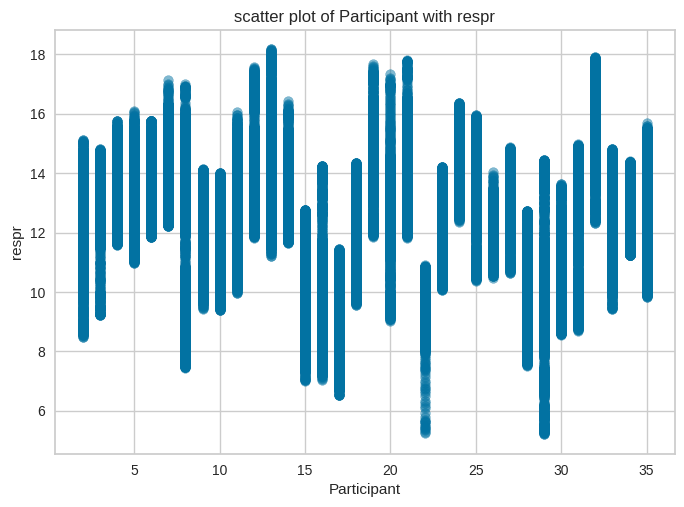

In [47]:
plt.scatter(data_df['Participant'], data_df['respr'], alpha=0.5)
plt.title('scatter plot of Participant with respr')
plt.xlabel('Participant')
plt.ylabel('respr')
plt.show()

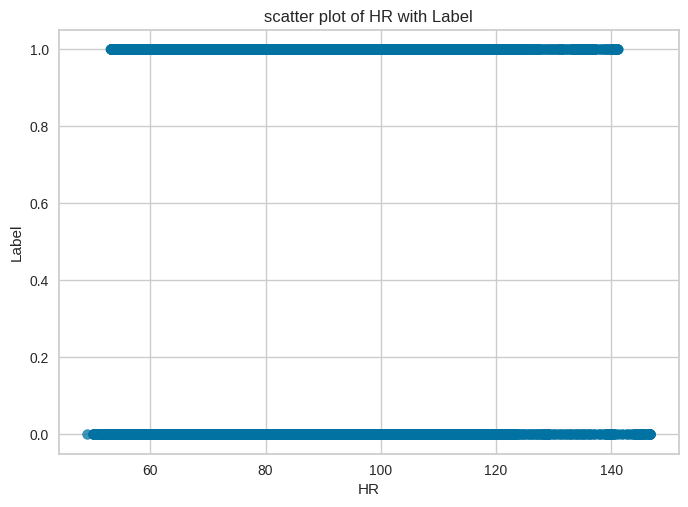

In [48]:
plt.scatter(data_df['HR'], data_df['Label'], alpha=0.5)
plt.title('scatter plot of HR with Label')
plt.xlabel('HR')
plt.ylabel('Label')
plt.show()

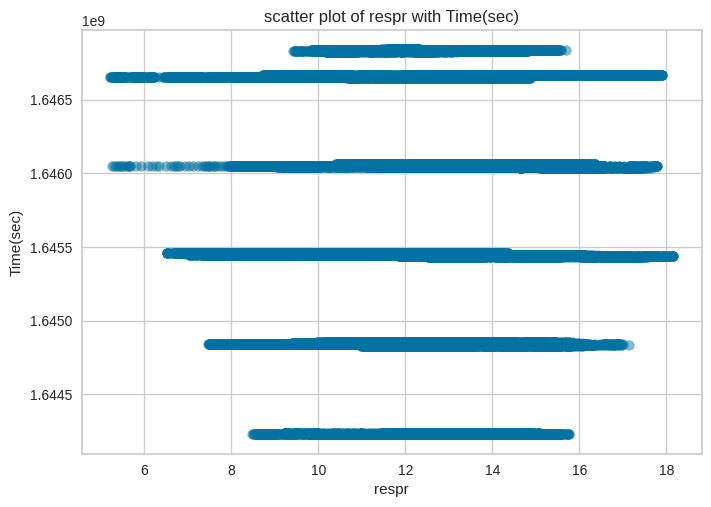

In [49]:
plt.scatter(data_df['respr'], data_df['Time(sec)'], alpha=0.5)
plt.title('scatter plot of respr with Time(sec)')
plt.xlabel('respr')
plt.ylabel('Time(sec)')
plt.show()

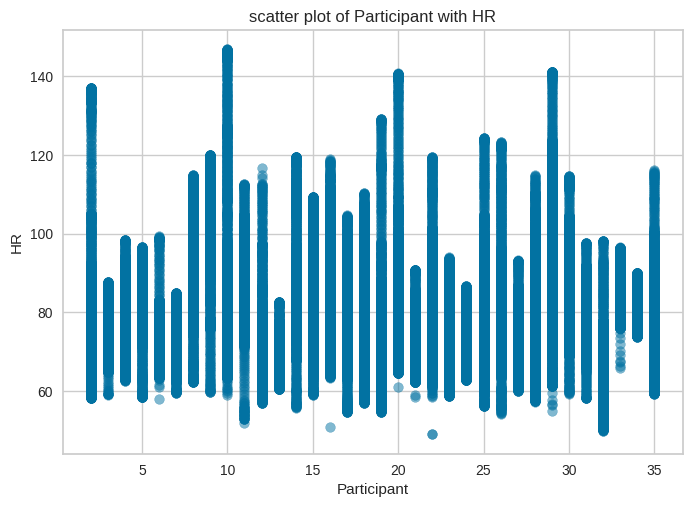

In [50]:
plt.scatter(data_df['Participant'], data_df['HR'], alpha=0.5)
plt.title('scatter plot of Participant with HR')
plt.xlabel('Participant')
plt.ylabel('HR')
plt.show()

Text(0, 0.5, 'respr')

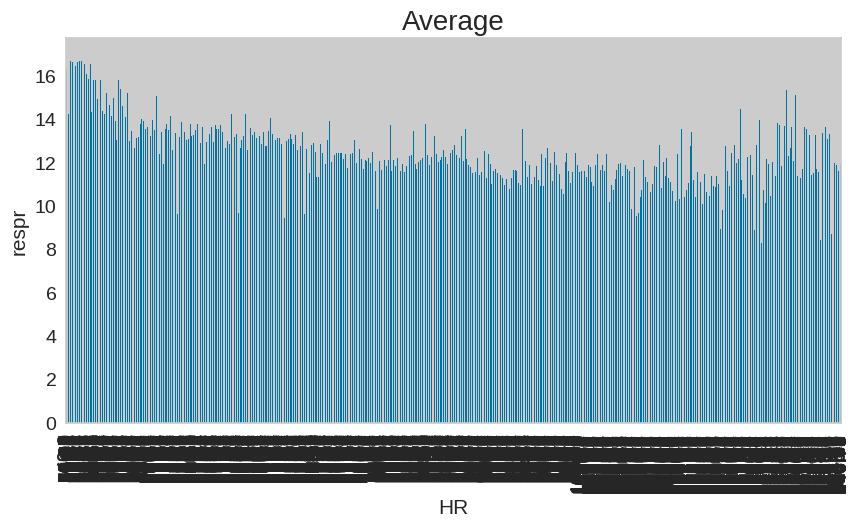

In [51]:
ax= data_df.groupby(['HR'])['respr'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

ax.set_title("Average", fontsize = 20)

ax.set_xlabel("HR", fontsize = 15)
ax.set_ylabel("respr", fontsize = 15)

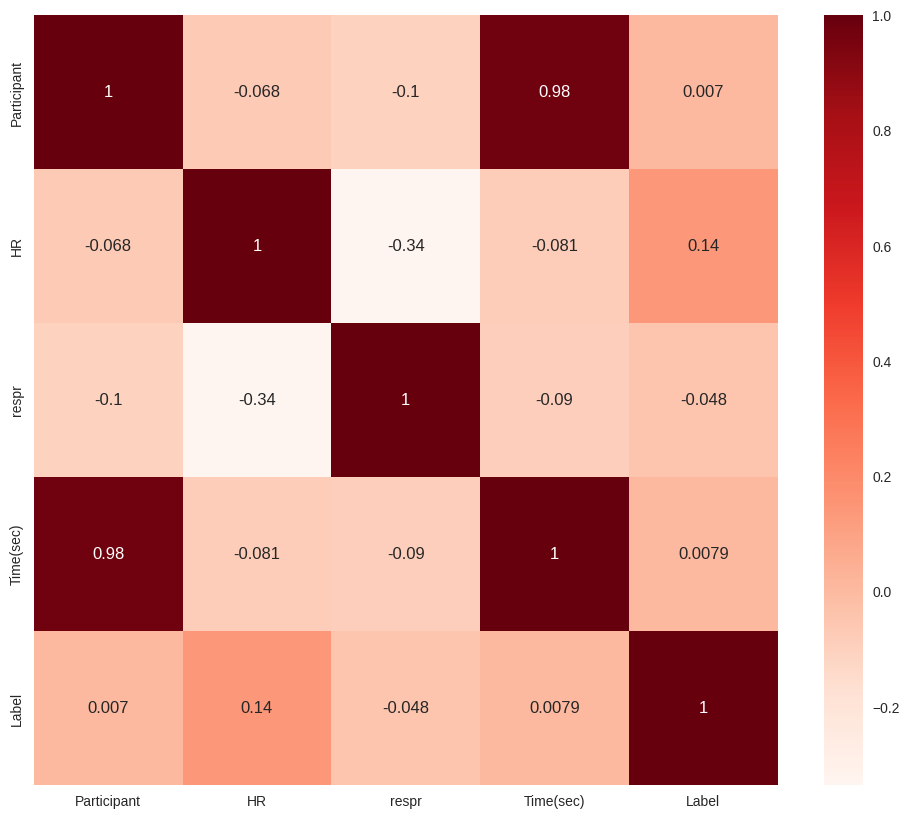

In [52]:
%matplotlib inline
plt.figure(figsize=(12,10))
cor = data_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#featureEngineering: Correlational matrix

<ipython-input-53-06e5acbdff36>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['HR'], fit=norm);


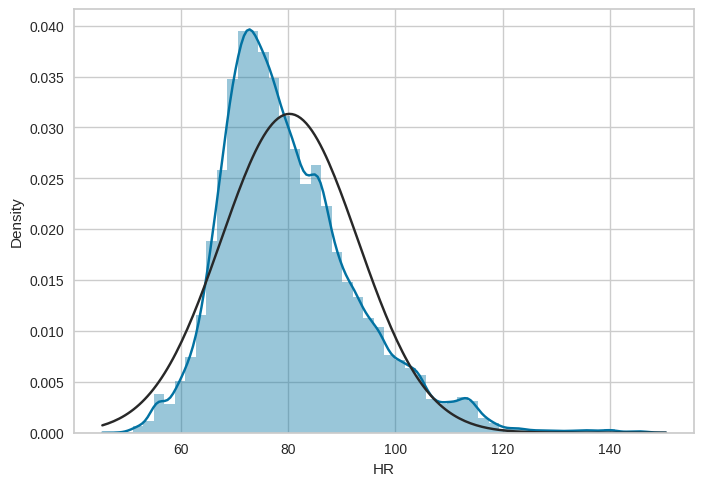

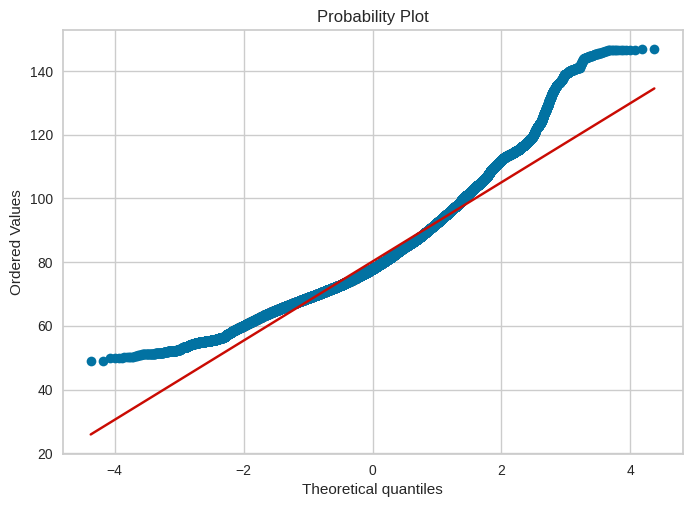

In [53]:
#Normality
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats
sns.distplot(data_df['HR'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_df['HR'], plot=plt)

Estimated coefficients:
b_0 = 1.2363636363636363            
b_1 = 1.1696969696969697


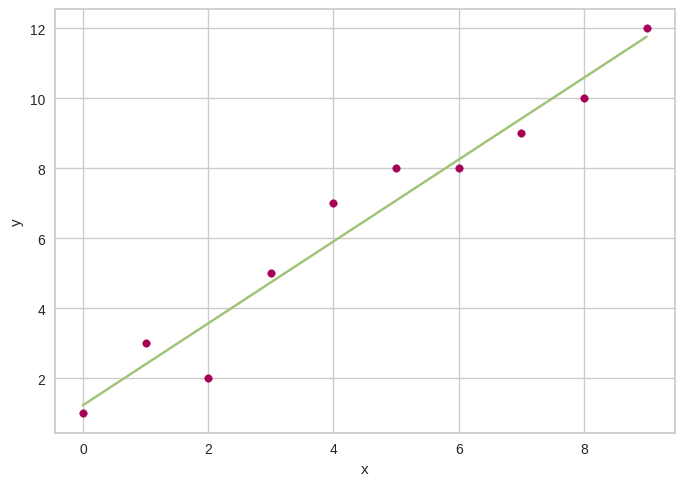

In [54]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()
  
def main():
    # observations / data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)
  
if __name__ == "__main__":
    main()
    #linear regression

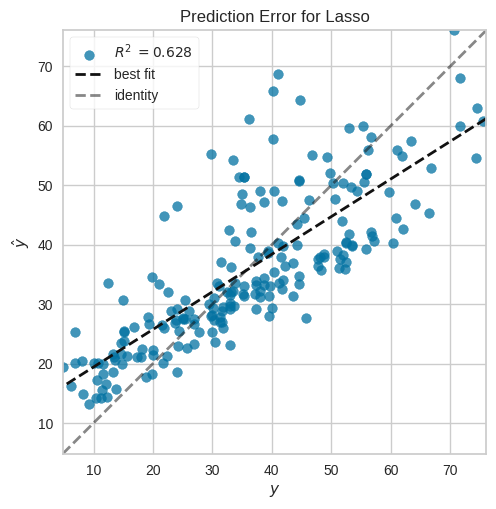

<Axes: title={'center': 'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [55]:
X, y = load_concrete()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()
# Error prediction plot              